In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns


In [3]:
train = pd.read_csv(r'/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.shape

(1460, 81)

In [6]:
test = pd.read_csv(r'/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [7]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Merging the data both train and test to maintain consistency.

In [8]:
data = pd.concat([train,test])

### Let us get some info

In [9]:
data.shape

(2919, 81)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [11]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,2919.0,NaN,NaN,NaN,1460.0,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,NaN,NaN,NaN,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
MSZoning,2915,5,RL,2265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,2433.0,NaN,NaN,NaN,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,NaN,NaN,NaN,10168.11408,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
...,...,...,...,...,...,...,...,...,...,...,...
MoSold,2919.0,NaN,NaN,NaN,6.213087,2.714762,1.0,4.0,6.0,8.0,12.0
YrSold,2919.0,NaN,NaN,NaN,2007.792737,1.314964,2006.0,2007.0,2008.0,2009.0,2010.0
SaleType,2918,9,WD,2525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition,2919,6,Normal,2402,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### lets find  the duplicates

In [12]:
data.duplicated().sum()

0

### Lets clean the data and try to drop the unwanted columns

### Find the missing Values

In [13]:
pd.set_option('display.max_rows', None)

In [14]:
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<AxesSubplot:>

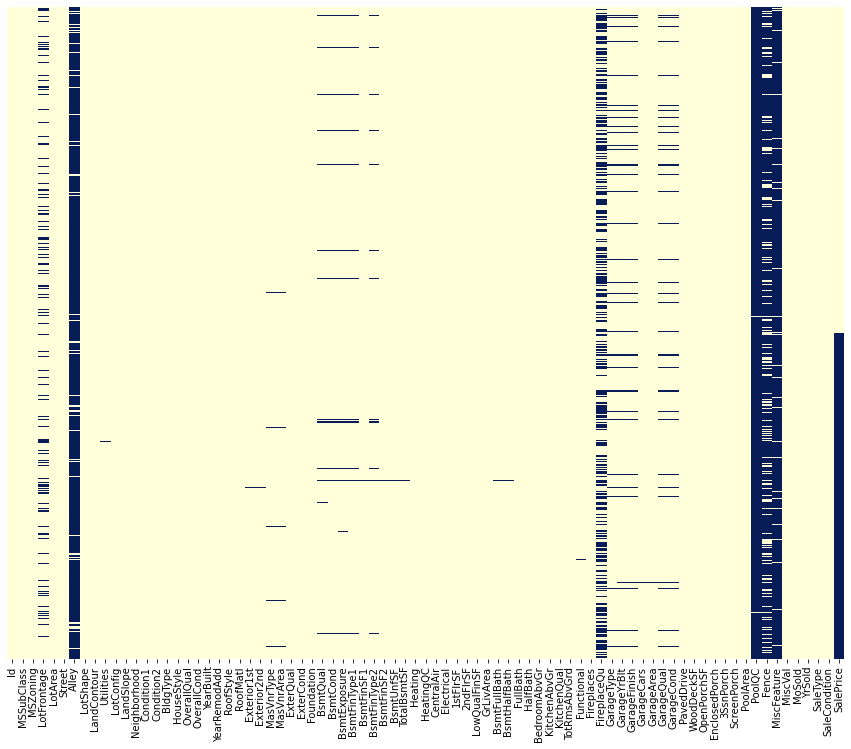

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

### dropping the columns which have more than 50 percent null values

In [16]:
data.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageQual        159
GarageCond        159
GarageYrBlt       159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
BsmtHalfBath        2
BsmtFullBath        2
Utilities           2
BsmtFinSF1          1
BsmtFinSF2          1
SaleType            1
Electrical          1
GarageCars          1
TotalBsmtSF         1
GarageArea          1
Exterior2nd         1
Exterior1st         1
KitchenQual         1
BsmtUnfSF           1
Fireplaces          0
TotRmsAbvGrd        0
SaleCondition       0
OpenPorchSF         0
YrSold              0
WoodDeckSF          0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
BedroomAbv

In [17]:
data.shape   # Combined data of both train and test 

(2919, 81)

### We could see four features (PoolQC,MiscFeature,Alley,Fence) have more than 50 percent nulldata, so we are dropping these columns. And also dropping Id column which is not required for modelling.
    

In [18]:
data.drop(columns=['PoolQC','Fence','MiscFeature','Alley','Id'], axis =1 , inplace=True)

In [19]:
data.drop(columns=['SalePrice'], axis=1, inplace=True)

In [20]:
data.shape    ## five columns dropped

(2919, 75)

### Handling missing values

In [21]:
object_columns = [i for i in data.columns if data[i].dtype == 'object']
len(object_columns)

39

In [22]:
object_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [23]:
numerical_columns = [i for i in data.columns if data[i].dtype in ['int64', 'float64']]
len(numerical_columns)

36

In [24]:
numerical_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [25]:
## 39 + 36  = 75  - we have segregated the categorical and numerical columns to handle missing values respectively

In [26]:
def HandleMissingValues(df):
    values = {}
    for i in object_columns:
        values[i] = df[i].mode()[0]
    for i in numerical_columns:
        values[i] = df[i].mean()
    df.fillna(value=values,inplace=True)
HandleMissingValues(data)


In [27]:
data.isnull().sum()        # null values has been handled

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

### One hot encoding the categorical values

In [28]:
def dummy_df(df, dummy_col_list):
    for x in dummy_col_list:
        dummies = pd.get_dummies(df[x], dummy_na=False)
        df =df.drop(x,1)
        df =pd.concat([df,dummies], axis =1)
    return df


In [29]:
data = dummy_df(data,object_columns)

In [30]:
data.shape

(2919, 275)

### Removing the duplicated columns 

In [31]:
final_data =data.loc[:,~data.columns.duplicated()]

In [32]:
final_data.shape

(2919, 203)

In [33]:
#spliting the data into train and test separately
train_data=final_data.iloc[:1460,:]
test_data=final_data.iloc[1460:,:]
print(train_data.shape)
test_data.shape

(1460, 203)


(1459, 203)

### Modelling data

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [35]:
x=train_data
y=train.loc[:,'SalePrice']

In [36]:
x.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [37]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [40]:
model =LinearRegression()

In [41]:
model.fit(x_train,y_train)

LinearRegression()

In [42]:
model.coef_

array([-5.24413327e+01, -3.02175005e+01,  6.10339033e-01,  6.49136003e+03,
        6.00295530e+03,  2.66126584e+02,  9.05953173e+01,  7.70430303e+00,
        1.51200289e+01,  1.90674304e+00, -1.76079634e+00,  1.52661086e+01,
        1.15152640e+01,  1.77982233e+01,  2.91647888e+00,  3.22302004e+01,
        2.23693179e+03,  1.39416690e+03,  1.26019647e+03,  3.09041150e+03,
       -2.76111126e+03, -1.72218260e+04,  3.55236727e+03,  5.05933848e+03,
        5.55379356e+01,  2.63146970e+03,  2.20001890e+01,  1.65803896e+01,
        1.84757660e+01,  1.49609053e+01,  4.90423287e+01,  4.85414652e+01,
        2.52100050e+01, -2.90268884e-02, -6.12031293e+02,  2.66222529e+02,
       -2.50241683e+04,  4.21611648e+03,  1.04961325e+04,  6.91576853e+03,
        3.39615078e+03,  1.52983243e+03, -1.52983243e+03, -8.46432806e+03,
        7.13788435e+02,  1.37251082e+04, -5.97456862e+03, -5.55982800e+03,
        1.13950320e+04, -1.40878386e+04,  8.25263461e+03,  2.38720470e+04,
       -2.38720470e+04,  

In [43]:
model.intercept_

-1451571.212138501

In [44]:
x_train_pred = model.predict(x_train)
x_test_pred = model.predict(x_test)

In [45]:
#actual data from hackathon
test_pred = model.predict(test_data)

In [46]:
x_train_rmse = np.sqrt(mean_squared_error(y_train,x_train_pred))
x_test_rmse = np.sqrt(mean_squared_error(y_test,x_test_pred))

In [47]:
print('x_train_rmse is',x_train_rmse )
print('x_test_rmse is',x_test_rmse )

x_train_rmse is 22916.118126239762
x_test_rmse is 31246.736814794654


In [48]:
x_train_r2 = r2_score(y_train,x_train_pred)
x_test_r2 =r2_score(y_test,x_test_pred)

In [49]:
print('x_train_r2 is',x_train_r2 )
print('x_test_r2 is',x_test_r2 )

x_train_r2 is 0.9138000925153263
x_test_r2 is 0.8631006290954623


In [50]:
test_pred_modified= np.where(test_pred<0, 0, test_pred)

In [51]:
test['SalePrice'] = test_pred_modified

In [52]:
Output = test[['Id','SalePrice']]

In [53]:
Output.to_csv('House_prediction_linear_Regression_80_percent_data.csv', index = False)